In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
# Load the dataset
df = pd.read_csv('sample_data/breached_services_info.csv', index_col=0)

In [110]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26T23:35:45Z,2017-12-10T21:44:27Z,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15T00:59:50Z,2020-11-15T01:07:10Z,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False
2,126,126,126.com,2012-01-01,2016-10-08T07:46:05Z,2016-10-08T07:46:05Z,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,False
3,17Media,17,17app.co,2016-04-19,2016-07-08T01:55:03Z,2016-07-08T01:55:03Z,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False,False
4,17173,17173,17173.com,2011-12-28,2018-04-28T04:53:15Z,2018-04-28T04:53:15Z,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",False,False,False,False,False,False,False


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                777 non-null    object
 1   Title               777 non-null    object
 2   Domain              739 non-null    object
 3   BreachDate          777 non-null    object
 4   AddedDate           777 non-null    object
 5   ModifiedDate        777 non-null    object
 6   PwnCount            777 non-null    int64 
 7   Description         777 non-null    object
 8   LogoPath            777 non-null    object
 9   DataClasses         777 non-null    object
 10  IsVerified          777 non-null    bool  
 11  IsFabricated        777 non-null    bool  
 12  IsSensitive         777 non-null    bool  
 13  IsRetired           777 non-null    bool  
 14  IsSpamList          777 non-null    bool  
 15  IsMalware           777 non-null    bool  
 16  IsSubscriptionFree  777 non-nul

In [112]:
df.describe()

,PwnCount
count,7.770000e+02
mean,1.739676e+07
std,7.006886e+07
min,8.580000e+02
25%,2.695520e+05
50%,1.141278e+06
75%,5.970416e+06
max,7.729050e+08


In [113]:
df.isna().sum()

,0
Name,0
Title,0
Domain,38
BreachDate,0
AddedDate,0
ModifiedDate,0
PwnCount,0
Description,0
LogoPath,0
DataClasses,0


In [114]:
df['Domain'] = df['Domain'].fillna('Unknown')

In [115]:
# Convert 'BreachDate' to datetime format
df['BreachDate'] = pd.to_datetime(df['BreachDate'], format='%Y-%m-%d')
# Convert 'AddedDate' and 'ModifiedDate' to datetime format
df['AddedDate'] = pd.to_datetime(df['AddedDate'], format='%Y-%m-%dT%H:%M:%SZ')
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'], format='%Y-%m-%dT%H:%M:%SZ')

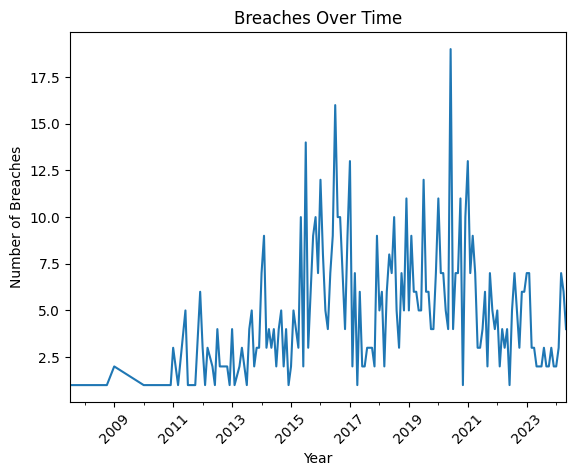

In [116]:
# Convert dates to datetime format if not already
df['BreachDate'] = pd.to_datetime(df['BreachDate'])
df['AddedDate'] = pd.to_datetime(df['AddedDate'])
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'])

# Plot breaches over time
breach_counts = df['BreachDate'].dt.to_period('M').value_counts().sort_index()
breach_counts.plot()
plt.title('Breaches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)
plt.show()

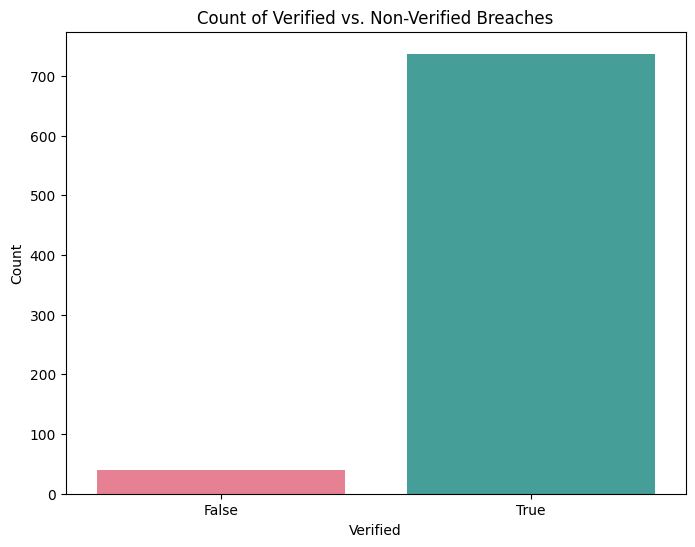

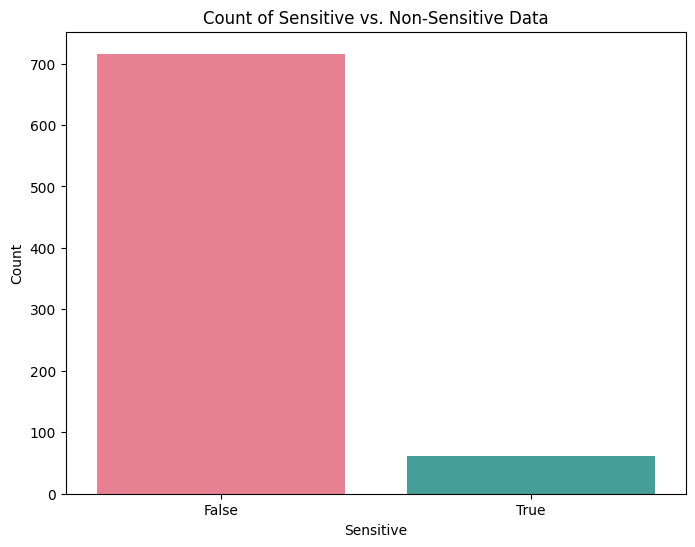

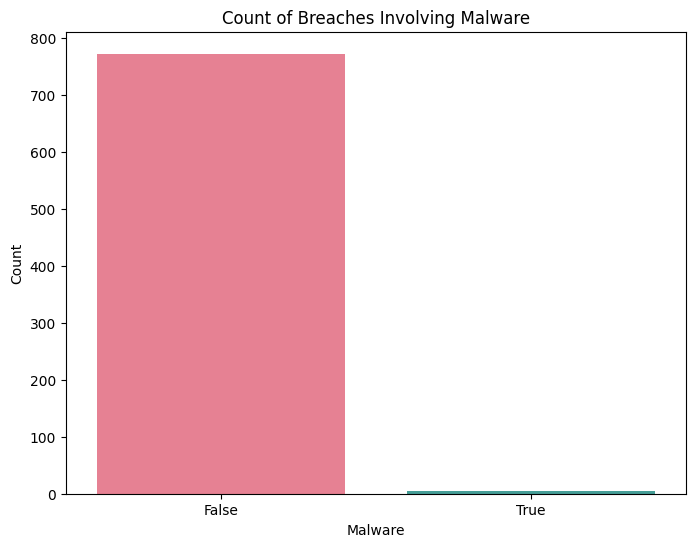

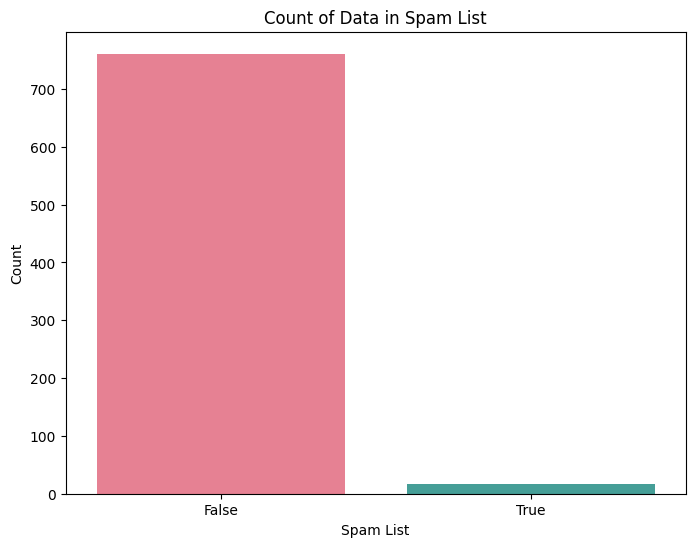

In [117]:
# Using a built-in palette
palette = sns.color_palette('husl', 2)  # 'husl' provides a set of two colors

# Bar chart for 'IsVerified'
plt.figure(figsize=(8, 6))
sns.countplot(x='IsVerified', data=df, hue='IsVerified', palette=palette, legend=False)
plt.title('Count of Verified vs. Non-Verified Breaches')
plt.xlabel('Verified')
plt.ylabel('Count')
plt.show()

# Bar chart for 'IsSensitive'
plt.figure(figsize=(8, 6))
sns.countplot(x='IsSensitive', data=df, hue='IsSensitive', palette=palette, legend=False)
plt.title('Count of Sensitive vs. Non-Sensitive Data')
plt.xlabel('Sensitive')
plt.ylabel('Count')
plt.show()

# Bar chart for 'IsMalware'
plt.figure(figsize=(8, 6))
sns.countplot(x='IsMalware', data=df, hue='IsMalware', palette=palette, legend=False)
plt.title('Count of Breaches Involving Malware')
plt.xlabel('Malware')
plt.ylabel('Count')
plt.show()

# Bar chart for 'IsSpamList'
plt.figure(figsize=(8, 6))
sns.countplot(x='IsSpamList', data=df, hue='IsSpamList', palette=palette, legend=False)
plt.title('Count of Data in Spam List')
plt.xlabel('Spam List')
plt.ylabel('Count')
plt.show()

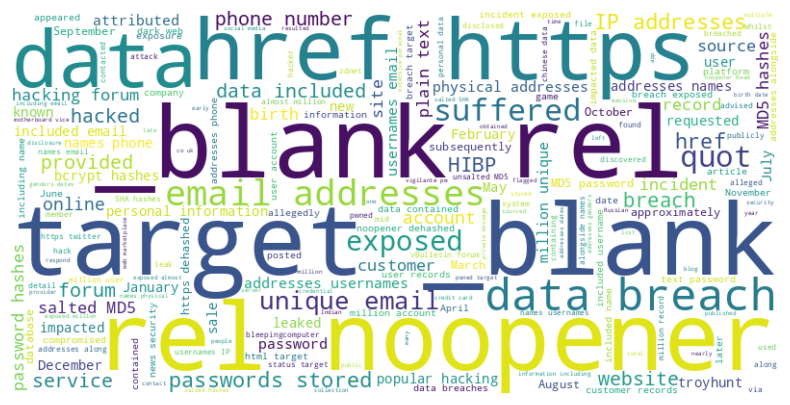

In [118]:
from wordcloud import WordCloud

# Generate a word cloud
text = ' '.join(df['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

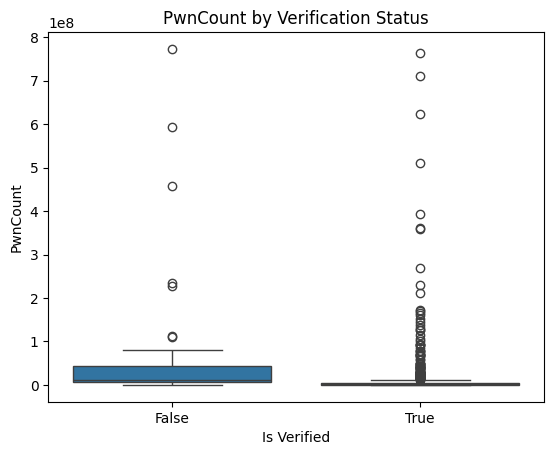

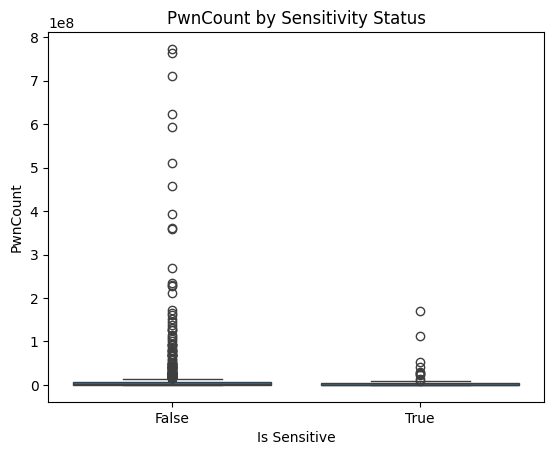

In [119]:
# Relationship between 'PwnCount' and 'IsVerified'
sns.boxplot(x='IsVerified', y='PwnCount', data=df)
plt.title('PwnCount by Verification Status')
plt.xlabel('Is Verified')
plt.ylabel('PwnCount')
plt.show()

# Relationship between 'PwnCount' and 'IsSensitive'
sns.boxplot(x='IsSensitive', y='PwnCount', data=df)
plt.title('PwnCount by Sensitivity Status')
plt.xlabel('Is Sensitive')
plt.ylabel('PwnCount')
plt.show()


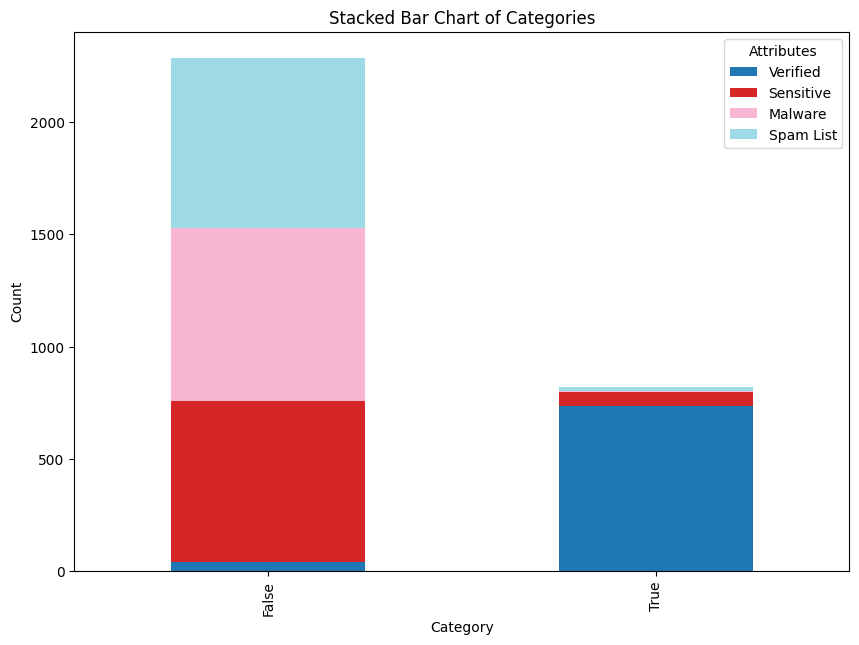

In [120]:
# Create a DataFrame for the stacked bar chart
stacked_df = pd.DataFrame({
    'Verified': df['IsVerified'].value_counts(),
    'Sensitive': df['IsSensitive'].value_counts(),
    'Malware': df['IsMalware'].value_counts(),
    'Spam List': df['IsSpamList'].value_counts()
}).fillna(0).astype(int)

# Plot stacked bar chart
stacked_df.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
plt.title('Stacked Bar Chart of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Attributes')
plt.show()

##Model Training

In [121]:
# Encode categorical features
label_encoder = LabelEncoder()
df['IsSensitive'] = label_encoder.fit_transform(df['IsSensitive'])

# Optional: convert datetime columns to numerical features
df['BreachDate'] = pd.to_datetime(df['BreachDate'])
df['AddedDate'] = pd.to_datetime(df['AddedDate'])
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'])

df['DaysSinceBreach'] = (df['AddedDate'] - df['BreachDate']).dt.days
df['DaysSinceModified'] = (df['ModifiedDate'] - df['BreachDate']).dt.days

In [122]:
# Select relevant features
features = ['PwnCount', 'DaysSinceBreach', 'DaysSinceModified']
X = df[features]
y = df['IsSensitive']


In [123]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [125]:
# Predict on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       215
           1       0.00      0.00      0.00        19

    accuracy                           0.92       234
   macro avg       0.46      0.50      0.48       234
weighted avg       0.84      0.92      0.88       234



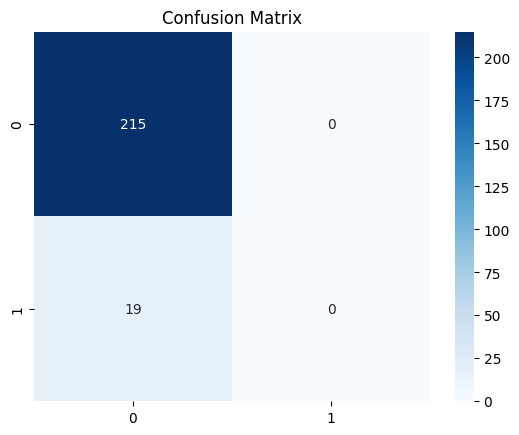

In [126]:
# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Model Interpretation

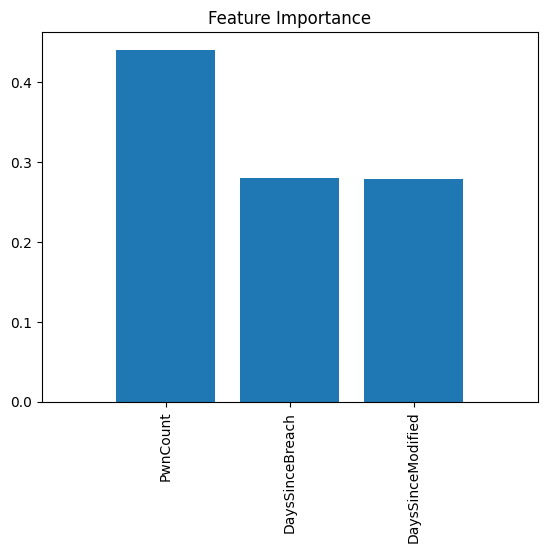

In [127]:
# Plot feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()